# Sesión de ejercicios 11

El objetivo de esta sesión es que el alumno pueda generar gráficos simples para analizar los resultados. 

La generación de gráficos es un eslabón importante cuando se realiza análisis de datos. Una vez los datos hayan sido capturados y tratados, se realizan cálculos sobre estos, y en muchas de las veces, se generan gráficos para ayudar a la interpretación de los resultados. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set()

%matplotlib inline

## Ejercicio 1

Genere un programa que dado una región, muestre un gráfico de barras con los valores de `Happiness Score` de los países pertenecientes a esa región. Para ello, usar el dataset `felicidad-2016.csv`.

El gráfico seleccionado deberá tener un tamaño lo suficientemente grande para poderlo visualizar claramente. Además, deberá tener las etiquetas en los ejes `x` y `y`

Ingrese una región: Western Europe


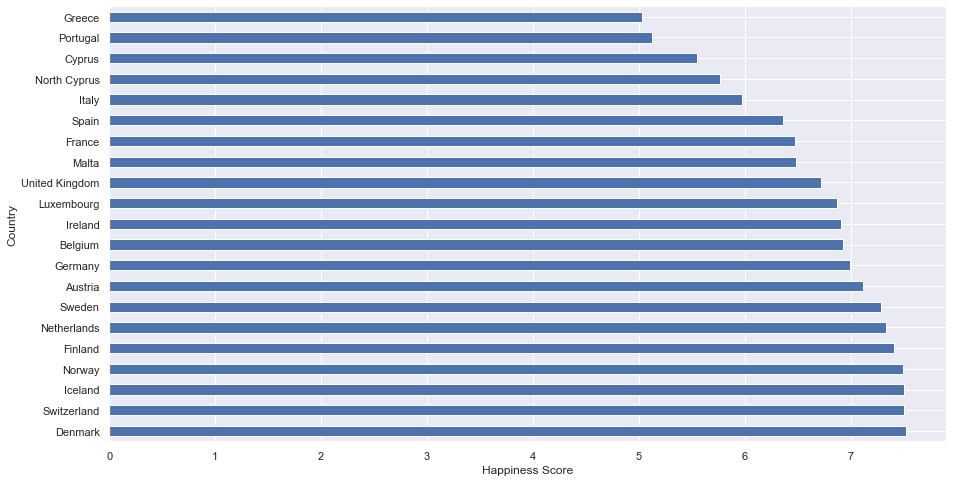

In [16]:
# Ingrese su código aquí

def mostrar_barras(region, ds):
    """Muestra un gráfico de barras con el `Happiness Score` de un grupo de países por región
    
    Parámetros
    ----------
    region: str
      region de interés
      
    ds: pd.DataFrame
      data frame con la información completa del dataset
    """
    # si la región no se encuentra, la función termina
    if region not in ds.Region.unique():
        return False
    
    # se filtran los resultados de países de la región
    tmp = ds.loc[ds.Region == region]
    
    # se crea el plot
    fig, ax = plt.subplots(1, 1, figsize=(15, 8))
    tmp["Happiness Score"].plot(kind="barh")
    
    ax.set_xlabel("Happiness Score")
    
    
ds = pd.read_csv("felicidad-2016.csv", index_col=0)

region = input("Ingrese una región: ")
mostrar_barras(region, ds)

## Ejercicio 2

Usando el mismo dataset que en el Ejercicio 1, genere un programa que muestre una figura con tres subplots (uno encima de otro), donde la información de los países a usarse estará seleccionada por su región (similar al ejercicio 1). El primer plot mostrará el GDP per capita; el segundo plot mostrará los valores de la columna `Family`; y, el tercer plot los valores de la columna `Freedom`. Todos los plots mostrarán gráficos de barras, y sus valores estarán ordenados de mayor a menor.

Ingrese una región: Latin America and Caribbean


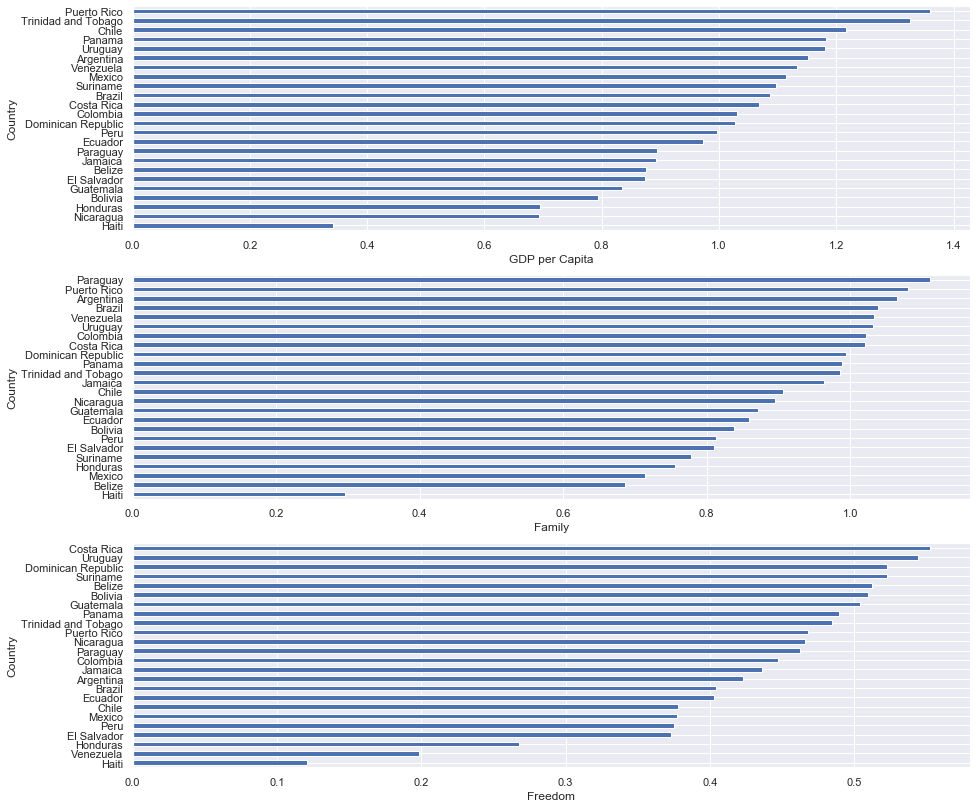

In [144]:
# Ingrese su código aquí

def mostrar_barras(region, ds):
    """Muestra un gráfico de barras con el `Happiness Score` de un grupo de países por región
    
    Parámetros
    ----------
    region: str
      region de interés
      
    ds: pd.DataFrame
      data frame con la información completa del dataset
    """
    # si la región no se encuentra, la función termina
    if region not in ds.Region.unique():
        return False
    
    # se filtran los resultados de países de la región
    tmp = ds.loc[ds.Region == region]
    
    # se crea el plot
    fig, ax = plt.subplots(3, 1, figsize=(15, 14))
    
    # plot 1
    tmp["Economy (GDP per Capita)"].sort_values().plot(kind="barh", ax=ax[0])
    ax[0].set_xlabel("GDP per Capita")
    
    # plot 2
    tmp["Family"].sort_values().plot(kind="barh", ax=ax[1])
    ax[1].set_xlabel("Family")
    
    # plot 3
    tmp["Freedom"].sort_values().plot(kind="barh", ax=ax[2])
    ax[2].set_xlabel("Freedom")
       
    
ds = pd.read_csv("felicidad-2016.csv", index_col=0)

region = input("Ingrese una región: ")
mostrar_barras(region, ds)

# Ejercicio 3

Usando el dataset `weather_2012.csv`genere un scatter plot para analizar la relación entre las variables `Temp` and `Rel_Hum`. Adicionalmente, se le pedirá al usuario que ingrese una fecha. El plot generado, mostrará los puntos que pertenecen al día ingresado de otro color.

Ayuda: para poder comparar una fecha ingresada con el índice, se debe crear un objeto de tipo `datetime.date`. Investigue como crear un objeto de este tipo y como usarlo para filtrar el dataset o generar una máscara.

In [58]:
from datetime import datetime, date

Ingrese una fecha entre [2012-01-01-2012-12-31] en formato yyyy/mm/dd: 2012/1/3


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


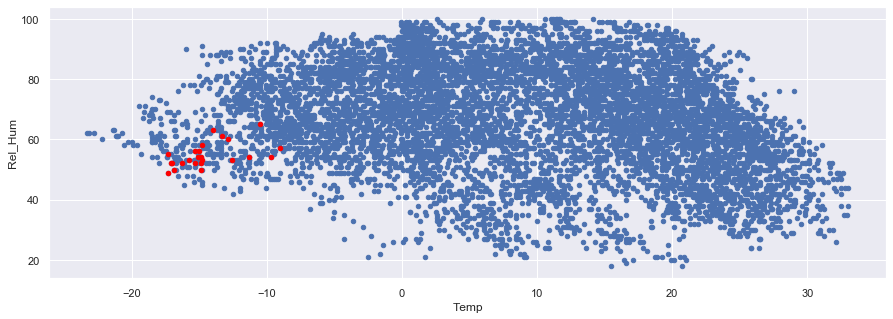

In [77]:
# Ingrese su código aquí

def mostrar_relacion(ds, columnas, dia):
    """Muestra un scatter plot con la relación de las variables descritas en `columnas`. Se resaltarán los puntos
    correspondientes al día `dia`
    
    Parametros
    ----------
    ds: pd.DataFrame
      dataset con la información completa
      
    columnas: list
      lista con las variables a analizar
    
    dia: datetime.date
      dia donde las lecturas se resaltarán
    """
    # máscara de selección de los elementos correspondientes al día
    m = ds.index.date == dia
    
    # se crea y genera el plot
    fig, ax = plt.subplots(figsize=(15, 5))
    
    # los datos sin resaltar
    ds.plot(kind="scatter", x="Temp", y="Rel_Hum", ax=ax)
    
    # datos resaltados
    ds.iloc[m].plot(kind="scatter", x="Temp", y="Rel_Hum", c="red", ax=ax)
    

ds = pd.read_csv("weather_2012.csv", index_col=0, parse_dates=["Date/Time"])
dia = input("Ingrese una fecha entre [{:}-{:}] en formato yyyy/mm/dd: ".format(ds.index.date[0], ds.index.date[-1]))
dia_lista = dia.split("/")
dia = date(year=int(dia_lista[0]), month=int(dia_lista[1]), day=int(dia_lista[2]))

mostrar_relacion(ds, ["Temp", "Rel_Hum"], dia)

## Ejercicio 4

Usando el mismo dataset que el ejercicio anterior, genere un gráfico donde se muestren en tres filas, la evolución de las siguientes variables: `Temp`, `Rel_Hum`, y `Visibility`. Estos valores deberán ser resampleados a una frecuencia de un mes, y se calcularán como sus datos promedio.

Las tres curvas deberán tener un color distinto, y deberán tener su respectiva leyenda.

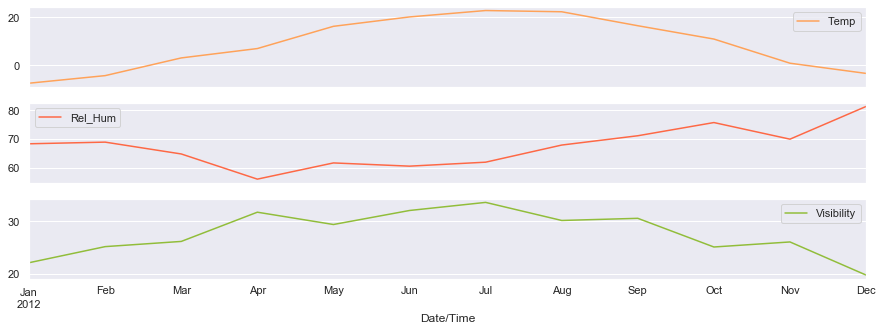

In [103]:
# Ingrese su código aquí

def mostrar_evolucion(ds, columnas):
    """Muestra 3 plots de líneas en base a la lista de columnas de `columnas`
    
    Parametros
    ----------
    ds: pd.DataFrame
      dataset con la información completa
      
    columnas: list
      lista con las variables a analizar
    """
    # colores a mostrar
    colores = ["#ffa259", "#fe6845", "#91bd3a"]
    
    # resampleo del dataset
    tmp = ds.resample("M").mean()
    
    # se muestran los plots
    fig, ax = plt.subplots(len(columnas), 1, figsize=(15, 5), sharex=True)
    for i, c in enumerate(columnas):
        tmp[c].plot(ax=ax[i], label=c, color=[colores[i]])
        ax[i].legend()
        

ds = pd.read_csv("weather_2012.csv", index_col=0, parse_dates=["Date/Time"])
mostrar_evolucion(ds, ["Temp", "Rel_Hum", "Visibility"])

## Ejercicio 5

Los boxplots son gráficos orientados a comparar distribuciones de los valores de alguna variable. Este plot muestra el valor promedio y la densidad de puntos en cada distribución. Para aclarar este punto, referirse a https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

Usando el mismo dataset que el ejercicio anterior, construya un gráfico con tres columnas donde se muestren boxplots de la variable `Visibility` cuando el Clima `Weather` contenga Fog, Thunderstorms, y Snow.

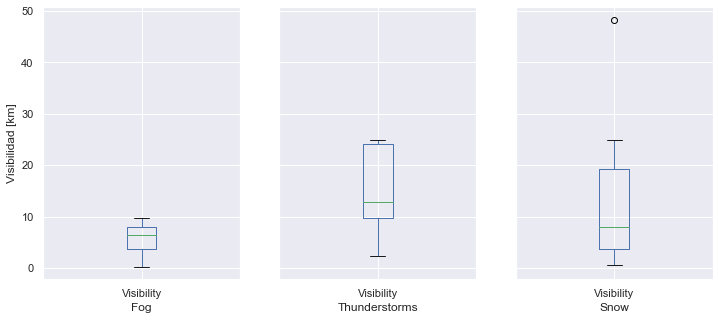

In [136]:
# Ingrese su código aquí

def mostrar_boxplots(ds, clima):
    """Muestra boxplots, uno por cada variable de la lista `clima`
    
    Parametros
    ----------
    ds: pd.DataFrame
      dataset con la información completa
      
    clima: list
      lista con variables a mostrar
    """    
    fig, ax = plt.subplots(1, len(clima), sharey=True, figsize=(12, 5))
    for i, c in enumerate(clima):
        ds.loc[ds["Weather"].str.contains(c)]["Visibility"].plot(kind="box", ax=ax[i])
        ax[i].set_xlabel(c)
        ax[i].set_ylabel("Visibilidad [km]")

ds = pd.read_csv("weather_2012.csv", index_col=0, parse_dates=["Date/Time"])
mostrar_boxplots(ds, ["Fog", "Thunderstorms", "Snow"])

## Ejercicio 6

Basándose en el ejercicio 10 de la sesión de ejercicios anterior, genere una figura con las 3 curvas correspondientes al valor promedio, mínimo, y máximo de potencia. Cada curva deberá estar en el mismo plot, deberá tener un color distinto, y deberá tener una leyenda descriptiva.

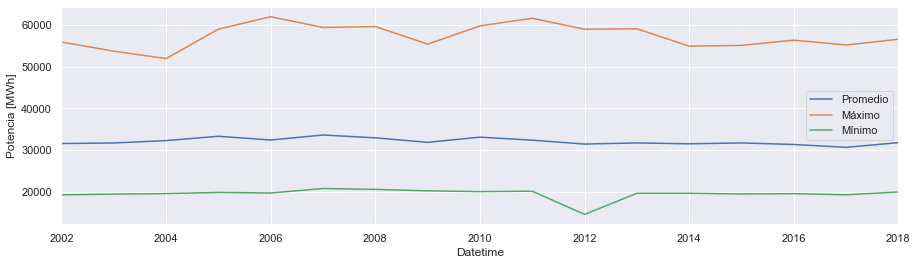

In [137]:
# Ingrese su código aquí

def mostrar_curvas_potencia(ds):
    """Muestra 3 curvas con los valores promedio, máximo, y mínimo de los valores de potencia anual en el dataset `ds`
    
    Parametros
    ----------
    ds: pd.DataFrame
      dataset con la información completa
    """
    
    fig, ax = plt.subplots(1, 1, figsize=(15, 4))
    
    # resampleo anual y se calculan la media, maximo y mínimo
    ds.resample("Y").agg(["mean", "max", "min"]).plot(ax=ax)
    
    # se modifica la leyenda
    ax.legend(["Promedio", "Máximo", "Mínimo"])
    ax.set_ylabel("Potencia [MWh]")

ds = pd.read_csv("PJME_hourly.csv", index_col=0, parse_dates=[0])
mostrar_curvas_potencia(ds)